# Implementation of XGBoost using all variables

Used for comparison between selected variables using XGBoost

Note: Run 'pip install xgboost' in console or 'conda install -c conda-forge py-xgboost' in conda to download XGBoost library

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

sb.set()

In [2]:
df = pd.read_csv("student-por.csv", sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [3]:
y = pd.DataFrame((df['G3'] >= 10).replace({True: 1, False: 0}))
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   G3      649 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [4]:
df = df.drop('G3', axis=1).copy()

In [5]:
df['age'] = df['age'].astype(object)
df['Medu'] = df['Medu'].astype(object)
df['Fedu'] = df['Fedu'].astype(object)
df['traveltime'] = df['traveltime'].astype(object)
df['studytime'] = df['studytime'].astype(object)
df['famrel'] = df['famrel'].astype(object)
df['freetime'] = df['freetime'].astype(object)
df['goout'] = df['goout'].astype(object)
df['Dalc'] = df['Dalc'].astype(object)
df['Walc'] = df['Walc'].astype(object)
df['health'] = df['health'].astype(object)

df['failures'] = df['failures'].astype(float)
df['absences'] = df['absences'].astype(float)
df['G1'] = df['G1'].astype(float)
df['G2'] = df['G2'].astype(float)

In [6]:
df.dtypes

school         object
sex            object
age            object
address        object
famsize        object
Pstatus        object
Medu           object
Fedu           object
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime     object
studytime      object
failures      float64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel         object
freetime       object
goout          object
Dalc           object
Walc           object
health         object
absences      float64
G1            float64
G2            float64
dtype: object

In [8]:
objectDF = pd.DataFrame(df.select_dtypes(include=['object']))
objectDF

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,yes,no,no,4,3,4,1,1,3
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,yes,yes,no,5,3,3,1,1,3
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,yes,no,4,3,2,2,3,3
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,yes,3,2,2,1,1,5
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,yes,no,no,4,3,2,1,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,no,yes,yes,no,5,4,2,1,2,5
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,yes,yes,no,4,3,4,1,1,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,yes,yes,no,no,1,1,1,1,1,5
647,MS,M,17,U,LE3,T,3,1,services,services,...,no,yes,yes,no,2,4,5,3,4,2


In [11]:
numericalDF = pd.DataFrame(df.select_dtypes(include=['float64']))
numericalDF

,failures,absences,G1,G2
0,0.0,4.0,0.0,11.0
1,0.0,2.0,9.0,11.0
2,0.0,6.0,12.0,13.0
3,0.0,0.0,14.0,14.0
4,0.0,0.0,11.0,13.0
...,...,...,...,...
644,1.0,4.0,10.0,11.0
645,0.0,4.0,15.0,15.0
646,0.0,6.0,11.0,12.0
647,0.0,6.0,10.0,10.0


In [12]:
new_DF = pd.DataFrame()

for obj in objectDF:
    col = objectDF[obj].unique()
    for i in col:
        new_DF[obj+" "+str(i)] = (objectDF[obj]==i).replace({True:'1', False: '0'})
        new_DF[obj+" "+str(i)] = (objectDF[obj]==i).astype(int)
        
for num in numericalDF:
    new_DF[num] = numericalDF[num]
        
new_DF

C:\Users\User\AppData\Local\Temp\ipykernel_9468\3369604022.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_DF[num] = numericalDF[num]
C:\Users\User\AppData\Local\Temp\ipykernel_9468\3369604022.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_DF[num] = numericalDF[num]
C:\Users\User\AppData\Local\Temp\ipykernel_9468\3369604022.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at onc

,school GP,school MS,sex F,sex M,age 18,age 17,age 15,age 16,age 19,age 22,...,Walc 5,health 3,health 5,health 1,health 2,health 4,failures,absences,G1,G2
0,1,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0.0,4.0,0.0,11.0
1,1,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0.0,2.0,9.0,11.0
2,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0.0,6.0,12.0,13.0
3,1,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0.0,0.0,14.0,14.0
4,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0.0,0.0,11.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1.0,4.0,10.0,11.0
645,0,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,4.0,15.0,15.0
646,0,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.0,6.0,11.0,12.0
647,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0.0,6.0,10.0,10.0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(new_DF, y, test_size = 0.25)

In [15]:
clf_xgb = xgb.XGBClassifier(seed=42,objective='binary:logistic',gamma=0.25,learn_rate=0.1,max_depth=4,reg_lambda=10,scale_pos_weight=3,subsample=0.9,colsample_bytree=0.5)
clf_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric='aucpr', eval_set=[(X_test, y_test)])

[17:01:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "learn_rate" } are not used.

[0]	validation_0-aucpr:0.96395
[1]	validation_0-aucpr:0.97561
[2]	validation_0-aucpr:0.99096
[3]	validation_0-aucpr:0.99091
[4]	validation_0-aucpr:0.99059
[5]	validation_0-aucpr:0.99106
[6]	validation_0-aucpr:0.99074
[7]	validation_0-aucpr:0.99059
[8]	validation_0-aucpr:0.99061
[9]	validation_0-aucpr:0.99608
[10]	validation_0-aucpr:0.99749
[11]	validation_0-aucpr:0.99744
[12]	validation_0-aucpr:0.99754
[13]	validation_0-aucpr:0.99777
[14]	validation_0-aucpr:0.99771
[15]	validation_0-aucpr:0.99752
[16]	validation_0-aucpr:0.99756
[17]	validation_0-aucpr:0.99760
[18]	validation_0-aucpr:0.99755
[19]	validation_0-aucpr:0.99755
[20]	validation_0-aucpr:0.99766
[21]	validation_0-aucpr:0.99771
[22]	validation_0-aucpr:0.99788
[23]	validation_0-aucpr:0.99784
[24]	validation_0-aucpr:0.99793
[25]	validation_0-aucpr:0.99793
[26]	validation_0-aucpr:0.99793
[2

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-aucpr:0.99794
[30]	validation_0-aucpr:0.99794
[31]	validation_0-aucpr:0.99794
[32]	validation_0-aucpr:0.99789
[33]	validation_0-aucpr:0.99789
[34]	validation_0-aucpr:0.99789
[35]	validation_0-aucpr:0.99795
[36]	validation_0-aucpr:0.99790


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learn_rate=0.1, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


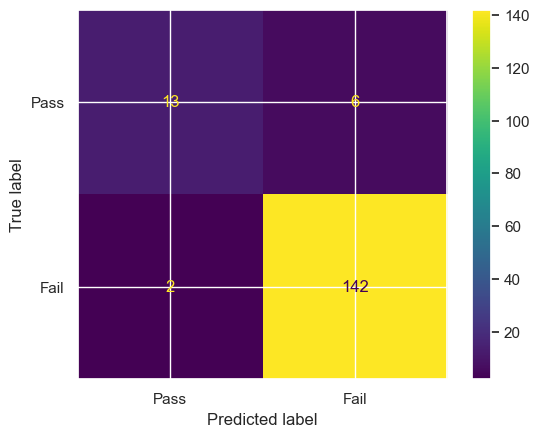

In [16]:
plot_confusion_matrix(clf_xgb, X_test, y_test, values_format='d', display_labels=["Pass", "Fail"])

# Conclusion

Accuracy = (TN + TP)/Total
<br>
Accuracy = (13 + 142)/163 (0.951)

When using all variables provided, we find that there is an accuracy of 0.951, we now compare this result to that of selected results from K-means clustering